In [24]:
#importing modules that wil be used

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
#Read the csv data

csv_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
churn_data = pd.read_csv(csv_path)

#Understanding the data
print("Printing columns")
print(churn_data.columns)

print(churn_data.head())

print("Printing Stats summary")
print(churn_data.describe())


Printing columns
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL          

In [3]:
#Check for missing data
print(churn_data.isnull().values.any())


#Clean data by droping null value at position 488

churn_data['TotalCharges'].loc[churn_data['TotalCharges'] == " "] = None 


churn_data.dropna(inplace=True)


print(churn_data.count())

False
customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64


/home/t1tn/.local/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


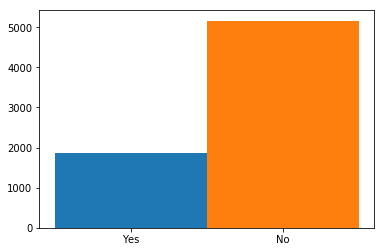

In [4]:
churn_yes = churn_data["Churn"].loc[churn_data["Churn"] == "Yes"]
churn_no = churn_data["Churn"].loc[churn_data["Churn"] == "No"]


plt.hist([churn_yes], bins='auto')
plt.hist([churn_no], bins='auto')

plt.show()

In [5]:
#Drop columns that don't have direct influence to user churn 
churn_data.drop("customerID",axis = 1,inplace = True)


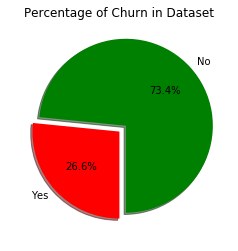

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [6]:
sizes = churn_data['Churn'].value_counts(sort = True)
colors = ["green","red"] 
#rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, colors=colors, explode= (0.1,0), labels = ["No", "Yes"],
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

print(churn_data.head(5))

In [7]:
#Convert all categorical data into numerical data
cat_columns = ["OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "PaymentMethod" ,"gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "Contract", "Churn"]

for column in cat_columns:
    churn_data[column] = pd.get_dummies(churn_data[column])



In [8]:
churn_data.head(20)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        1              0        0           1       1             1   
1        0              0        1           1      34             0   
2        0              0        1           1       2             0   
3        0              0        1           1      45             1   
4        1              0        1           1       2             0   
5        1              0        1           1       8             0   
6        0              0        1           0      22             0   
7        1              0        1           1      10             1   
8        1              0        0           1      28             0   
9        0              0        1           0      62             0   
10       0              0        0           0      13             0   
11       0              0        1           1      16             0   
12       0              0        0           1      58             0   
13       0              0        1           1      49             0   
14       0              0        1           1      25             0   
15       1              0        0           0      69             0   
16       1              0        1           1      52             0   
17       0              0        1           0      71             0   
18       1              0        0           0      10             0   
19       1              0        1           1      21             0   

    MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0               0                1               1             0   
1               1                1               0             1   
2               1                1               0             0   
3               0                1               0             1   
4               1                0               1             1   
5               0                0               1             1   
6               0                0               1             0   
7               0                1               0             1   
8               0                0               1             1   
9               1                1               0             0   
10              1                1               0             1   
11              1                0               0             0   
12              0                0               1             1   
13              0                0               1             0   
14              1                0               0             1   
15              0                0               0             0   
16              1                0               0             0   
17              0                0               0             1   
18              1                1               1             1   
19              1                0               1             0   

    DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                  1            1            1                1         1   
1                  0            1            1                1         0   
2                  1            1            1                1         1   
3                  0            0            1                1         0   
4                  1            1            1                1         1   
5                  0            1            0                0         1   
6                  1            1            0                1         1   
7                  1            1            1                1         1   
8                  0            0            0                0         1   
9                  1            1            1                1         0   
10                 1            1            1                1         1   
11                 0            0            0                0         0   
12                 0            1            0               

In [9]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'])

In [10]:
# Setting Y and X values for training set

y = churn_data["Churn"]
X = churn_data.drop(labels = ["Churn"],axis = 1)



In [11]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state = 1)
    model.fit(train_X, train_y)
    predictions = model.predict(val_X)
    mae = mean_absolute_error(val_y, predictions)
    
    return mae


In [18]:
# Spliting the data 

train_X, test_X,  train_y, test_y = train_test_split(X,y, random_state = 5)

my_mln = 2

for max_leaf_nodes in  [5,10,50,500,5000]:
    #Getting the best mae as to not over or underfit our model
    my_mae = get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y)
   
    try:
        
        if my_mae < best_mae:
            best_mae = my_mae
            my_mln = max_leaf_nodes

        best_mae = my_mae
        
        print("Max leaf nodes: %f  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae))
    
    except NameError:
        best_mae = my_mae
        
churn_model = DecisionTreeRegressor(max_leaf_nodes=my_mln,random_state = 1)

#Fitting our model
churn_model.fit(train_X, train_y)

predictions = churn_model.predict(test_X)
print(mean_absolute_error(test_y, predictions))

print("Accuracy:",churn_model.score(train_X, train_y))


Max leaf nodes: 5.000000  		 Mean Absolute Error:  0.302612
Max leaf nodes: 10.000000  		 Mean Absolute Error:  0.292713
Max leaf nodes: 50.000000  		 Mean Absolute Error:  0.277024
Max leaf nodes: 500.000000  		 Mean Absolute Error:  0.271108
Max leaf nodes: 5000.000000  		 Mean Absolute Error:  0.277162
0.27110844073637985
Accuracy: 0.7356343752923493


In [20]:
dot_data = StringIO()
export_graphviz(churn_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Churn_Tree.png')
Image(graph.create_png())

In [25]:
print("RMSE for test is: %f" %(mean_squared_error(test_y, predictions)))

RMSE for test is: 0.220401
